# The Research Proposal

## The Problem

Historically in Major League Baseball (MLB) there have been a small set of statistics from gameplay that have been the considered the most important to determining if a team will have success (win) or not (lose). These stats are the pitcher's earned run average (ERA) and the batter's batting avereage. In more recent times there are a growing number of statisticians that are less convinced that these stats correlate directly to team success. We need to determine if the higher a team's batting average, and the lower it's ERA, correlate significantly to that team's win-loss record. For now I will focus on batting average.

## The Potential Solution - Hypothesis

Hyothesis: Teams with higher batting averages have more success.

Null: There is no difference in success for teams with higher batting averages.

## The Method of Testing the Solution

Will be conducting A-B testing to determine if higher batting averages are better at predicting success then teams without. The sample I'll be using is all MLB win/loss records for every team since 1950 as well as the batting averages for a given team during that timeframe. I will consider a confidence interval of 95% or greater a success.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from scipy.stats import ttest_ind

First I'll import the CSV file with teams, wins and losses. 

Next I'll import the batting stats for every player.

In [2]:
teams = pd.read_csv('Teams.csv', index_col=0)

In [3]:
batting = pd.read_csv('Batting.csv', index_col=0)

In [4]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearTeamID,,,,,,,,,,,,,,,,,,,,,
1871BS1,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1871CH1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
1871CL1,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
1871FW1,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
1871NY2,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [5]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearTeamID,,,,,,,,,,,,,,,,,,,,,
1871TRO,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1871RC1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
1871CL1,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
1871WS3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
1871RC1,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


Lets keep it to modern teams. After WW2 with a 5 year buffer should work.

In [6]:
teams.drop(teams[(teams.yearID < 1950)].index, inplace=True)

In [7]:
batting.drop(batting[(batting.yearID < 1950)].index, inplace=True)

Let's convert wins and losses to a winning percentage (win_p)

In [8]:
teams.insert(7,'win_p',teams['W']/teams['G'])

In [9]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,win_p,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearTeamID,,,,,,,,,,,,,,,,,,,,,
1950BOS,1950,AL,BOS,BOS,NaN,3,154,0.610390,77.0,94,...,181,0.981,Boston Red Sox,Fenway Park II,1344080.0,111,108,BOS,BOS,BOS
1950BRO,1950,NL,BRO,LAD,NaN,2,155,0.574194,78.0,89,...,183,0.979,Brooklyn Dodgers,Ebbets Field,1185896.0,103,99,BRO,BRO,BRO
1950BSN,1950,NL,BSN,ATL,NaN,4,156,0.532051,79.0,83,...,146,0.970,Boston Braves,Braves Field,944391.0,94,93,BSN,BSN,BSN
1950CHA,1950,AL,CHA,CHW,NaN,6,156,0.384615,79.0,60,...,181,0.977,Chicago White Sox,Comiskey Park,781330.0,97,98,CHW,CHA,CHA
1950CHN,1950,NL,CHN,CHC,NaN,7,154,0.415584,78.0,64,...,169,0.968,Chicago Cubs,Wrigley Field,1165944.0,99,102,CHC,CHN,CHN


In [10]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearTeamID,,,,,,,,,,,,,,,,,,,,,
1950CLE,aberal01,1950,1,CLE,AL,1,2,0,0,0,...,0.0,0.0,0.0,1,1.0,NaN,0.0,0.0,NaN,0.0
1950BRO,abramca01,1950,1,BRO,NL,38,44,5,9,1,...,4.0,0.0,NaN,9,13.0,NaN,0.0,1.0,NaN,0.0
1950CIN,adamsbo03,1950,1,CIN,NL,115,348,57,98,21,...,25.0,7.0,NaN,43,29.0,NaN,0.0,3.0,NaN,2.0
1950CHA,adamshe01,1950,1,CHA,AL,34,118,12,24,2,...,2.0,3.0,0.0,12,7.0,NaN,2.0,1.0,NaN,2.0
1950CIN,adcocjo01,1950,1,CIN,NL,102,372,46,109,16,...,55.0,2.0,NaN,24,24.0,NaN,0.0,3.0,NaN,12.0


Now I need to group batting by team and year, luckily I already have the yearTeamID to which to do this with.

In [11]:
team_batting = batting.groupby(['yearID','teamID']).sum()

Insert team batting average

In [12]:
team_batting.insert(5, 'avg',team_batting['H']/team_batting['AB'])

In [13]:
team_batting

stint     G    AB     R     H       avg   2B  3B   HR    RBI  \
yearID teamID                                                                 
1950   BOS        42  1728  5516  1027  1665  0.301849  287  61  161  974.0   
       BRO        37  1823  5364   847  1461  0.272371  247  46  194  774.0   
       BSN        38  1809  5363   785  1411  0.263099  246  36  148  726.0   
       CHA        53  1893  5260   625  1368  0.260076  172  47   93  592.0   
       CHN        33  1890  5230   643  1298  0.248184  224  47  161  615.0   
       CIN        37  1811  5253   654  1366  0.260042  257  27   99  617.0   
       CLE        31  1831  5263   806  1417  0.269238  222  46  164  758.0   
       DET        33  1799  5381   837  1518  0.282104  285  50  114  788.0   
       NY1        36  1844  5238   735  1352  0.258114  204  50  133  684.0   
       NYA        41  1875  5361   914  1511  0.281850  234  70  159  860.0   
       PHA        34  1721  5212   670  1361  0.261128  204  53  100  627.0   
       PHI        34  1848  5426   722  1440  0.265389  225  55  125  673.0   
       PIT        44  1988  5327   681  1404  0.263563  227  59  138  634.0   
       SLA        41  1896  5163   684  1269  0.245787  235  43  106  642.0   
       SLN        44  1845  5215   693  1353  0.259444  255  50  102  646.0   
       WS1        48  1784  5251   690  1365  0.259950  190  53   76  659.0   
1951   BOS        40  1830  5378   804  1428  0.265526  233  32  127  757.0   
       BRO        40  1928  5492   855  1511  0.275127  249  37  184  794.0   
       BSN        34  1843  5293   723  1385  0.261666  234  37  130  683.0   
       CHA        49  1902  5378   714  1453  0.270175  229  64   86  668.0   
       CHN        41  1929  5307   614  1327  0.250047  200  47  103  572.0   
       CIN        35  1892  5285   559  1309  0.247682  215  33   88  528.0   
       CLE        45  1822  5250   696  1346  0.256381  208  35  140  658.0   
       DET        37  1899  5336   685  1413  0.264805  231  35  104  636.0   
       NY1        35  1835  5360   781  1396  0.260448  201  53  179  734.0   
       NYA        47  1897  5194   798  1395  0.268579  208  48  140  741.0   
       PHA        40  1769  5277   736  1381  0.261702  262  43  102  685.0   
       PHI        38  1872  5332   648  1384  0.259565  199  47  108  609.0   
       PIT        53  2050  5318   689  1372  0.257992  218  56  137  648.0   
       SLA        67  1861  5219   611  1288  0.246791  223  47   86  555.0   
...              ...   ...   ...   ...   ...       ...  ...  ..  ...    ...   
2017   ARI        48  2360  5525   812  1405  0.254299  314  39  220  776.0   
       ATL        51  2373  5584   732  1467  0.262715  289  26  165  706.0   
       BAL        52  2351  5650   743  1469  0.260000  269  12  232  713.0   
       BOS        53  2334  5669   785  1461  0.257717  302  19  168  735.0   
       CHA        55  2289  5513   706  1412  0.256122  256  37  186  670.0   
       CHN        54  2420  5496   822  1402  0.255095  274  29  223  785.0   
       CIN        48  2321  5484   753  1390  0.253465  249  38  219  715.0   
       CLE        44  2366  5511   818  1449  0.262929  333  29  212  780.0   
       COL        44  2374  5534   824  1510  0.272859  293  38  192  793.0   
       DET        50  2336  5556   735  1435  0.258279  289  35  187  699.0   
       HOU        51  2313  5611   896  1581  0.281768  346  20  238  854.0   
       KCA        56  2342  5536   702  1436  0.259393  260  24  193  660.0   
       LAA        61  2392  5415   710  1314  0.242659  251  14  186  678.0   
       LAN        57  2464  5408   770  1347  0.249075  312  20  221  730.0   
       MIA        44  2399  5602   778  1497  0.267226  271  31  194  743.0   
       MIL        56  2423  5467   732  1363  0.249314  267  22  224  695.0   
       MIN        57  2324  5557   815  1444  0.259852  286  31  206  781.0   
       NYA        57  2294  5594   858  1463  0.261530  266  23  

In [14]:
team_win = teams.groupby(['yearID','teamID']).sum()

In [15]:
team_win

Rank    G     win_p  Ghome    W    L     R    AB     H   2B  \
yearID teamID                                                                
1950   BOS        3  154  0.610390   77.0   94   60  1027  5516  1665  287   
       BRO        2  155  0.574194   78.0   89   65   847  5364  1461  247   
       BSN        4  156  0.532051   79.0   83   71   785  5363  1411  246   
       CHA        6  156  0.384615   79.0   60   94   625  5260  1368  172   
       CHN        7  154  0.415584   78.0   64   89   643  5230  1298  224   
       CIN        6  153  0.431373   76.0   66   87   654  5253  1366  257   
       CLE        4  155  0.593548   77.0   92   62   806  5263  1417  222   
       DET        2  157  0.605096   81.0   95   59   837  5381  1518  285   
       NY1        3  154  0.558442   76.0   86   68   735  5238  1352  204   
       NYA        1  155  0.632258   77.0   98   56   914  5361  1511  234   
       PHA        8  154  0.337662   77.0   52  102   670  5212  1361  204   
       PHI        1  157  0.579618   78.0   91   63   722  5426  1440  225   
       PIT        8  154  0.370130   77.0   57   96   681  5327  1404  227   
       SLA        7  154  0.376623   74.0   58   96   684  5163  1269  235   
       SLN        5  153  0.509804   76.0   78   75   693  5215  1353  255   
       WS1        5  155  0.432258   78.0   67   87   690  5251  1365  190   
1951   BOS        3  154  0.564935   75.0   87   67   804  5378  1428  233   
       BRO        2  158  0.613924   78.0   97   60   855  5492  1511  249   
       BSN        4  155  0.490323   78.0   76   78   723  5293  1385  234   
       CHA        4  155  0.522581   78.0   81   73   714  5378  1453  229   
       CHN        8  155  0.400000   77.0   62   92   614  5307  1327  200   
       CIN        6  155  0.438710   77.0   68   86   559  5285  1309  215   
       CLE        2  155  0.600000   77.0   93   61   696  5250  1346  208   
       DET        5  154  0.474026   77.0   73   81   685  5336  1413  231   
       NY1        1  157  0.624204   78.0   98   59   781  5360  1396  201   
       NYA        1  154  0.636364   78.0   98   56   798  5194  1395  208   
       PHA        6  154  0.454545   79.0   70   84   736  5277  1381  262   
       PHI        5  154  0.474026   77.0   73   81   648  5332  1384  199   
       PIT        7  155  0.412903   78.0   64   90   689  5318  1372  218   
       SLA        8  154  0.337662   77.0   52  102   611  5219  1288  223   
...             ...  ...       ...    ...  ...  ...   ...   ...   ...  ...   
2017   ARI        2  162  0.574074   81.0   93   69   812  5525  1405  314   
       ATL        3  162  0.444444   81.0   72   90   732  5584  1467  289   
       BAL        5  162  0.462963   81.0   75   87   743  5650  1469  269   
       BOS        1  162  0.574074   81.0   93   69   785  5669  1461  302   
       CHA        4  162  0.413580   81.0   67   95   706  5513  1412  256   
       CHN        1  162  0.567901   81.0   92   70   822  5496  1402  274   
       CIN        5  162  0.419753   81.0   68   94   753  5484  1390  249   
       CLE        1  162  0.629630   81.0  102   60   818  5511  1449  333   
       COL        3  162  0.537037   81.0   87   75   824  5534  1510  293   
       DET        5  162  0.395062   81.0   64   98   735  5556  1435  289   
       HOU        1  162  0.623457   81.0  101   61   896  5611  1581  346   
       KCA        3  162  0.493827   81.0   80   82   702  5536  1436  260   
       LAA        2  162  0.493827   81.0   80   82   710  5415  1314  251   
       LAN        1  162  0.641975   81.0  104   58   770  5408  1347  312   
       MIA        2  162  0.475309   78.0   77   85   778  5602  1497  271   
       MIL        2  162  0.530864   84.0   86   76   732  5467  1363  267   
       MIN        2  162  0.524691   81.0   85   77   815  5557  1444  286   
       NYA        2  162  0.561728   81.0   91   71   858  5594  1463  266   
       NYN        4  162  0.432099   

In [16]:
team_win.shape

(1682, 35)

In [17]:
team_batting.shape

(1682, 19)

In [18]:
team_batting.insert(2, 'win_p',team_win['win_p'])

In [19]:
team_batting.head()

stint     G     win_p    AB     R     H       avg   2B  3B  \
yearID teamID                                                               
1950   BOS        42  1728  0.610390  5516  1027  1665  0.301849  287  61   
       BRO        37  1823  0.574194  5364   847  1461  0.272371  247  46   
       BSN        38  1809  0.532051  5363   785  1411  0.263099  246  36   
       CHA        53  1893  0.384615  5260   625  1368  0.260076  172  47   
       CHN        33  1890  0.415584  5230   643  1298  0.248184  224  47   

                HR    RBI    SB    CS   BB     SO  IBB   HBP     SH   SF  \
yearID teamID                                                              
1950   BOS     161  974.0  32.0  17.0  719  580.0  0.0  25.0   62.0  0.0   
       BRO     194  774.0  77.0   0.0  607  632.0  0.0  27.0   88.0  0.0   
       BSN     148  726.0  71.0   0.0  615  616.0  0.0  27.0   74.0  0.0   
       CHA      93  592.0  19.0  22.0  549  567.0  0.0  28.0  106.0  0.0   
       CHN     161  615.0  46.0   0.0  479  767.0  0.0  31.0   54.0  0.0   

                GIDP  
yearID teamID         
1950   BOS     153.0  
       BRO     139.0  
       BSN     136.0  
       CHA     156.0  
       CHN     122.0

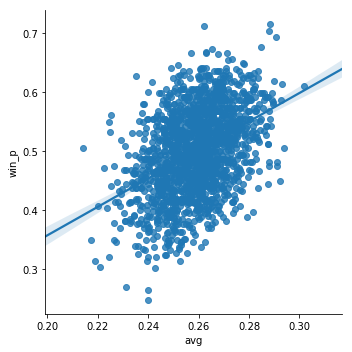

In [20]:
sns.lmplot(x='avg',y='win_p', data=team_batting)

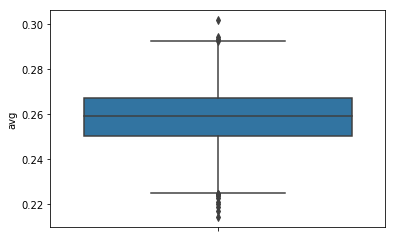

In [21]:
sns.boxplot(y='avg', data=team_batting)

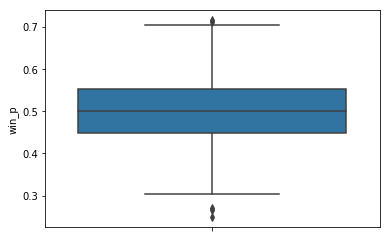

In [22]:
sns.boxplot(y='win_p', data=team_batting)

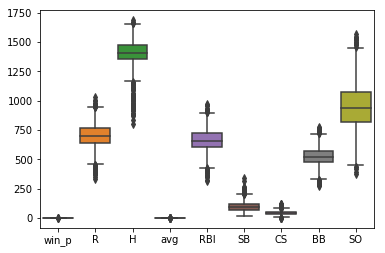

In [28]:
stats_team_batting = team_batting.drop(['stint', 'G', 'AB','2B','3B','HR','HBP','IBB','SH','SF','GIDP'], axis=1)
sns.boxplot(data=stats_team_batting)

In [29]:
team_batting.head()

stint     G     win_p    AB     R     H       avg   2B  3B  \
yearID teamID                                                               
1950   BOS        42  1728  0.610390  5516  1027  1665  0.301849  287  61   
       BRO        37  1823  0.574194  5364   847  1461  0.272371  247  46   
       BSN        38  1809  0.532051  5363   785  1411  0.263099  246  36   
       CHA        53  1893  0.384615  5260   625  1368  0.260076  172  47   
       CHN        33  1890  0.415584  5230   643  1298  0.248184  224  47   

                HR    RBI    SB    CS   BB     SO  IBB   HBP     SH   SF  \
yearID teamID                                                              
1950   BOS     161  974.0  32.0  17.0  719  580.0  0.0  25.0   62.0  0.0   
       BRO     194  774.0  77.0   0.0  607  632.0  0.0  27.0   88.0  0.0   
       BSN     148  726.0  71.0   0.0  615  616.0  0.0  27.0   74.0  0.0   
       CHA      93  592.0  19.0  22.0  549  567.0  0.0  28.0  106.0  0.0   
       CHN     161  615.0  46.0   0.0  479  767.0  0.0  31.0   54.0  0.0   

                GIDP  
yearID teamID         
1950   BOS     153.0  
       BRO     139.0  
       BSN     136.0  
       CHA     156.0  
       CHN     122.0

In [30]:
print(ttest_ind(team_batting['win_p'], team_batting['avg'], equal_var=False))

Ttest_indResult(statistic=133.82580027545617, pvalue=0.0)


By running the T-test we get a p-value of 0, essentially that we can reject the null hypothesis that batting average does not affect success (winning percentage) at all. Therefore at any confidence interval we can conclude that batting average does absolutely correlate to winning percentage.